In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import re

# Load and Read the data

In [2]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Checking for outliers

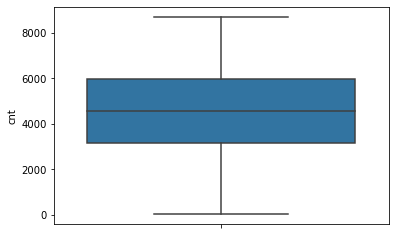

In [5]:
sns.boxplot(y='cnt',data=df)

plt.show()

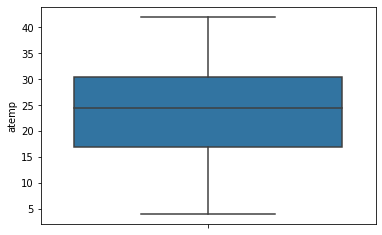

In [6]:
sns.boxplot(y='atemp',data=df)
plt.show()

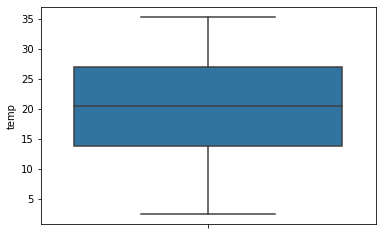

In [7]:
sns.boxplot(y='temp',data=df)
plt.show()

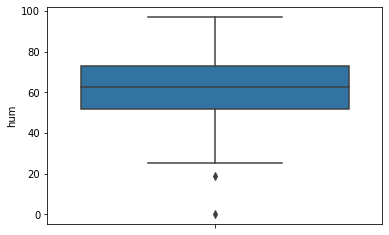

In [8]:
sns.boxplot(y='hum',data=df)
plt.show()

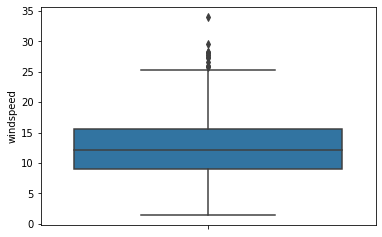

In [9]:
sns.boxplot(y='windspeed',data=df)
plt.show()

In [10]:
df[df['hum']<20].shape[0]/df.shape[0]*100

0.273972602739726

In [11]:
df[df['windspeed']>25].shape[0]/df.shape[0]*100

2.328767123287671

As the percentage of records where humidity less than 20 and windspeed greater than 30 are very less it is safe to remove the outliers

In [12]:
df=df[df['hum']>=20]
df=df[df['windspeed']<=25]
df.shape[0]

712

Removing the columns casual and registered users as we are interested on the total count of cyclists. Also we remove unwanted columns such as dteday and instant

to_remove=['casual','registered','instant','dteday']
df=df[df.columns[~df.columns.isin(to_remove)]]

In [13]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


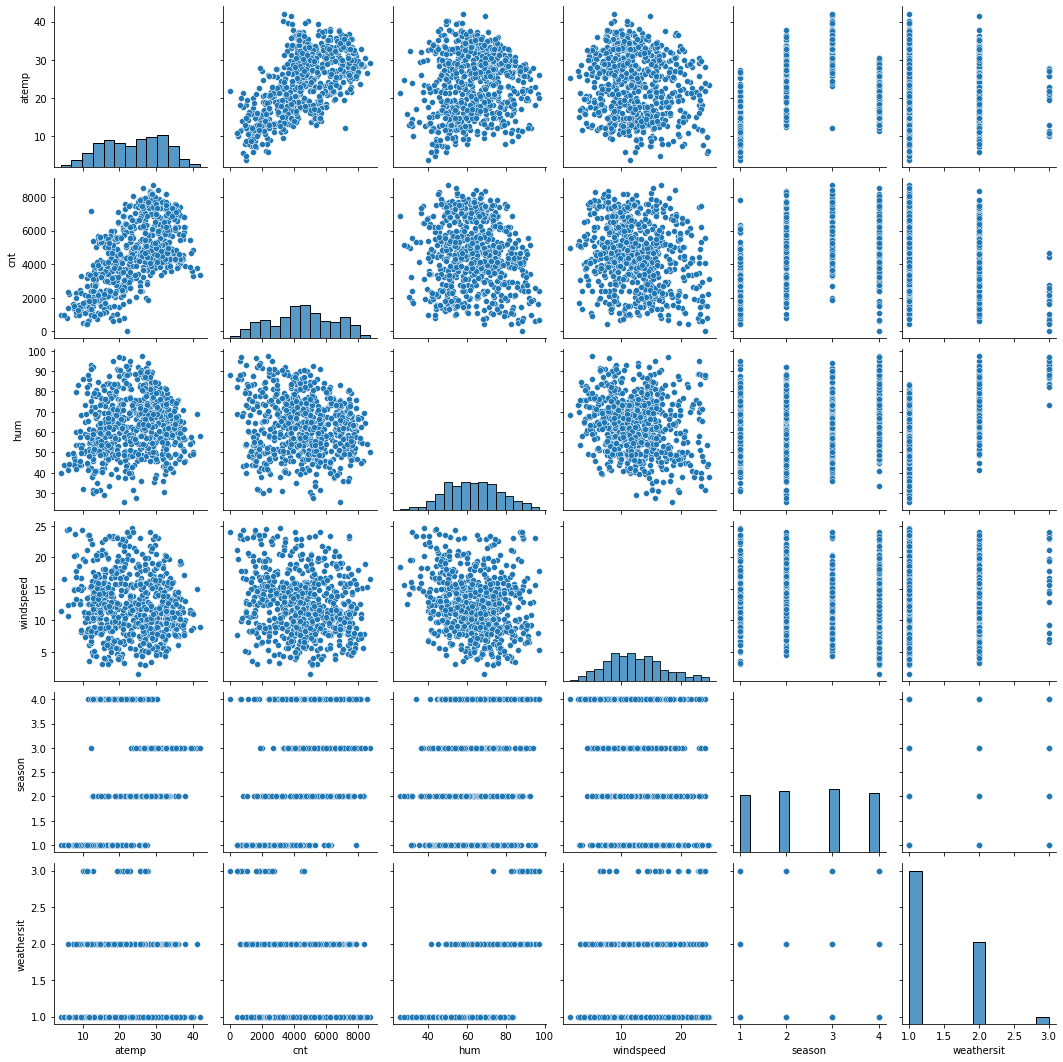

In [14]:
sns.pairplot(vars=['atemp','cnt','hum','windspeed','season','weathersit'],data=df)
plt.show()

### Plotting the heatmap of correlation of all the variables in the dataset

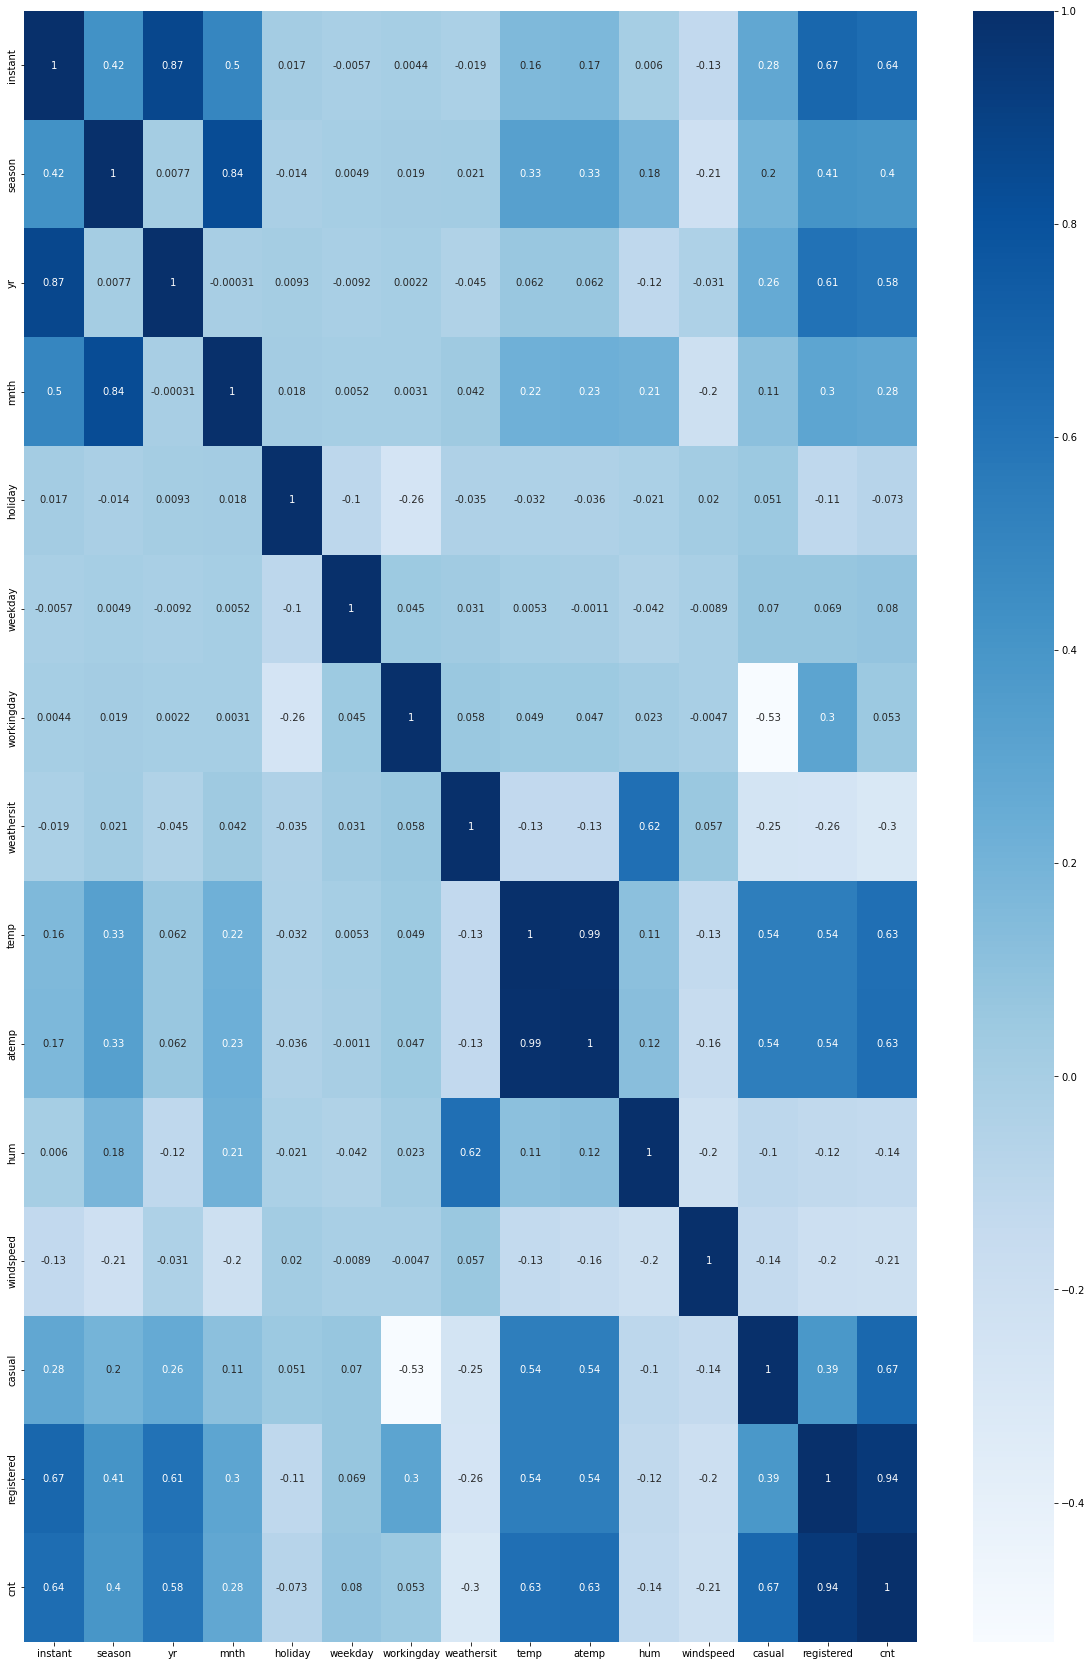

In [15]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

#### High correlation exists between the below variables:
1. feeling temperature and actual temperature. Hence we drop the actual temperature
2. Season and Months. Hence we drop the Months columns

In [16]:
df.pop('temp')

0      14.110847
1      14.902598
2       8.050924
3       8.200000
4       9.305237
         ...    
725    10.420847
726    10.386653
727    10.386653
728    10.489153
729     8.849153
Name: temp, Length: 712, dtype: float64

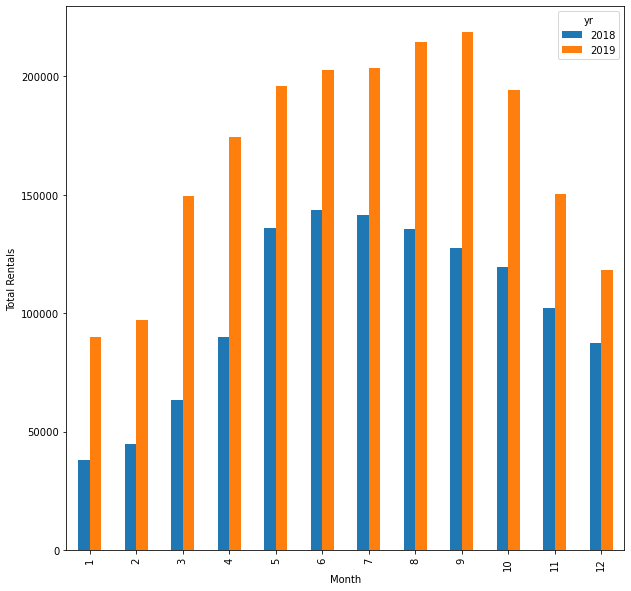

In [17]:
yr_w=df.pivot_table(index='mnth',columns='yr',values='cnt',aggfunc=sum)
yr_w=yr_w.rename(columns={0:2018,1:2019})
yr_w.plot(kind='bar',figsize=(10,10),ylabel='Total Rentals',xlabel='Month')
plt.show()

In [18]:
df.pop('mnth')

0       1
1       1
2       1
3       1
4       1
       ..
725    12
726    12
727    12
728    12
729    12
Name: mnth, Length: 712, dtype: int64

From the heatmap of month wise rented cycles it is observed that more rentals occur in summer and start of autmn season. <br>
In winter months the rentals are less

### Converting the season and weathersit columns into categorical variable

In [19]:
#4 is classified as winter
#3 is classified as fall
#2 is classified as summer
#1 is classified as spring
df['season']=df.season.map({4:'winter',3:'fall',2:'summer',1:'spring'})


In [20]:
#Clear, Few clouds, Partly cloudy, Partly cloudy is classified as good
#Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist is classified as moderate
#Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds is classified as bad
#Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog is classified as extreme
df['weathersit']=df.weathersit.map({1:'good',2:'moderate',3:'bad',4:'extreme'})


In [21]:
df['weekday']=df.weekday.map({6:'Monday',0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday'})

In [22]:
df

,instant,dteday,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,0,Monday,0,moderate,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,0,Tuesday,0,moderate,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,0,Wednesday,1,good,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,0,Thursday,1,good,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,0,Friday,1,good,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,0,Saturday,1,moderate,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,0,Sunday,1,moderate,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,0,Monday,0,moderate,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,0,Tuesday,0,good,11.58500,48.3333,23.500518,364,1432,1796


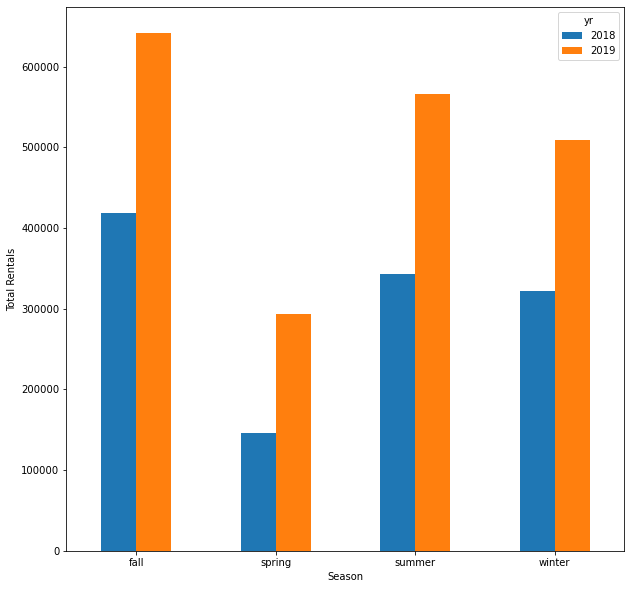

In [23]:
yr_w=df.pivot_table(index='season',columns='yr',values='cnt',aggfunc=sum)
yr_w=yr_w.rename(columns={0:2018,1:2019})
yr_w.plot(kind='bar',figsize=(10,10),ylabel='Total Rentals',xlabel='Season',rot=0)
plt.show()

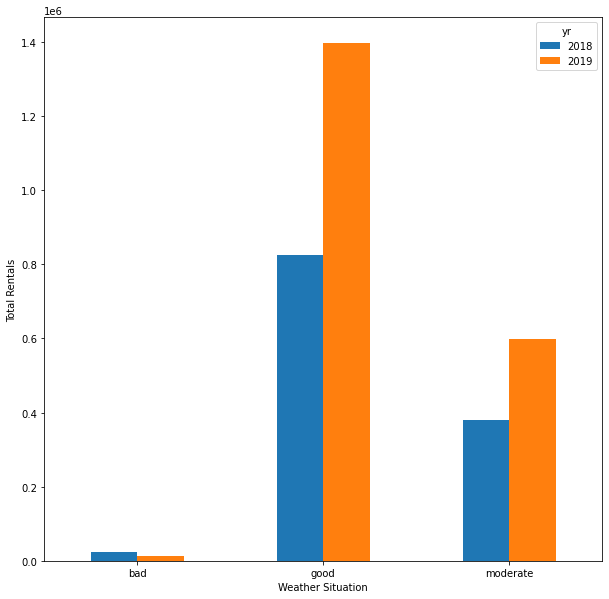

In [24]:
yr_w=df.pivot_table(index='weathersit',columns='yr',values='cnt',aggfunc=sum)
yr_w=yr_w.rename(columns={0:2018,1:2019})
yr_w.plot(kind='bar',figsize=(10,10),ylabel='Total Rentals',xlabel='Weather Situation',rot=0)
plt.show()

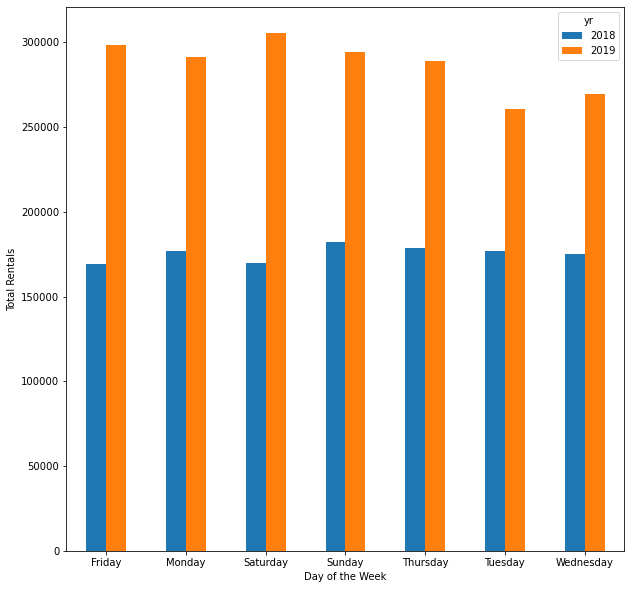

In [25]:
yr_w=df.pivot_table(index='weekday',columns='yr',values='cnt',aggfunc=sum)
yr_w=yr_w.rename(columns={0:2018,1:2019})
yr_w.plot(kind='bar',figsize=(10,10),ylabel='Total Rentals',xlabel='Day of the Week',rot=0)
plt.show()

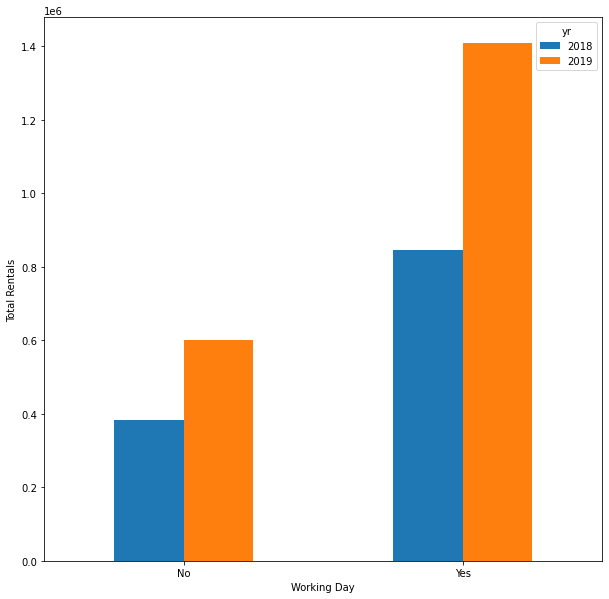

In [26]:
yr_w=df.pivot_table(index='workingday',columns='yr',values='cnt',aggfunc=sum)
yr_w=yr_w.rename(columns={0:2018,1:2019},index={0:'No',1:'Yes'})

yr_w.plot(kind='bar',figsize=(10,10),ylabel='Total Rentals',xlabel='Working Day',rot=0)
plt.show()

### Conclusion drawn from above plots
1.In Fall season and good weather conditions more number of cycles are rented<br>
2.In working days more number of cycles are rented

## Creating dummies for column season and weathersit

In [27]:

dum=pd.get_dummies(df['season'])
df=pd.concat([df,dum],axis=1)
df.pop('season')

dum=pd.get_dummies(df['weathersit'])
df=pd.concat([df,dum],axis=1)
df.pop('weathersit')

dum=pd.get_dummies(df['weekday'])
df=pd.concat([df,dum],axis=1)
df.pop('weekday')
df.pop('instant')
df.pop('dteday')
df.pop('casual')
df.pop('registered')
df

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,spring,summer,...,bad,good,moderate,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,10.60610,59.0435,10.739832,1562,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,1,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,11.33210,65.2917,23.458911,2114,0,1,0,...,0,0,1,0,0,1,0,0,0,0
726,1,0,1,12.75230,59.0000,10.416557,3095,0,1,0,...,0,0,1,0,0,0,1,0,0,0
727,1,0,0,12.12000,75.2917,8.333661,1341,0,1,0,...,0,0,1,0,1,0,0,0,0,0
728,1,0,0,11.58500,48.3333,23.500518,1796,0,1,0,...,0,1,0,0,0,0,0,0,1,0


### Splitting the data into test and train data

In [28]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

### Scaling the data using minmax scaler

In [29]:
to_scale_col=['atemp','hum','windspeed','cnt']

scaler=MinMaxScaler()
df_train[to_scale_col]=scaler.fit_transform(df_train[to_scale_col])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [30]:
y_train_sm=df_train.pop('cnt')


## Building the model

#### Based on the above analysis we start building the model. First we build the model using all the independent variables and then observe the VIR and pvalue.

In [31]:
cols_to_consider=df_train.columns
x_train=df_train[cols_to_consider]
x_train_sm=sm.add_constant(x_train)

lm=sm.OLS(y_train_sm,x_train_sm)
lms=lm.fit()
print(lms.summary())
vir1=pd.DataFrame([variance_inflation_factor(x_train_sm.values,i) for i in range(len(x_train_sm.columns))],columns=['VIR'])
vir1['Entry']=x_train_sm.columns
vir1

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     171.2
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          8.13e-187
Time:                        23:37:02   Log-Likelihood:                 512.81
No. Observations:                 498   AIC:                            -991.6
Df Residuals:                     481   BIC:                            -920.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0845      0.015      5.697      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIR,Entry
0,0.000000,const
1,1.050730,yr
2,inf,holiday
3,inf,workingday
4,3.486259,atemp
5,2.032015,hum
6,1.198912,windspeed
7,inf,fall
8,inf,spring
9,inf,summer


### Using RFE we find the 13 most significant features and eliminate the rest

In [32]:
linreg = LinearRegression()
rfe = RFE(linreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(x_train_sm, y_train_sm)
rfe_table=pd.DataFrame(x_train_sm.columns,columns=['Name'])
rfe_table['Support']=rfe.support_
rfe_table['Ranking']=rfe.ranking_
rfe_table[~rfe_table['Support']].Name.to_list()

rfe_table.sort_values(by='Ranking')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=13 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


,Name,Support,Ranking
10,winter,True,1
1,yr,True,1
2,holiday,True,1
3,workingday,True,1
4,atemp,True,1
5,hum,True,1
18,Thursday,True,1
15,Monday,True,1
8,spring,True,1
13,moderate,True,1


### Rebuilding the model using the output features of RFE and checking VIR

In [33]:
x_train_fil=x_train_sm[rfe_table[rfe_table['Support']].Name.to_list()]
cols_to_consider=x_train_fil.columns
x_train=df_train[cols_to_consider]
x_train_sm=sm.add_constant(x_train)

lm=sm.OLS(y_train_sm,x_train_sm)
lms=lm.fit()
print(lms.summary())
vir1=pd.DataFrame([variance_inflation_factor(x_train_sm.values,i) for i in range(len(x_train_sm.columns))],columns=['VIR'])
vir1['Entry']=x_train_sm.columns
vir1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     237.4
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          1.74e-187
Time:                        23:37:02   Log-Likelihood:                 500.51
No. Observations:                 498   AIC:                            -977.0
Df Residuals:                     486   BIC:                            -926.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0680      0.016      4.229      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIR,Entry
0,0.000000,const
1,1.039404,yr
2,inf,holiday
3,inf,workingday
4,2.658085,atemp
5,1.848610,hum
6,2.552517,spring
7,1.754948,winter
8,inf,bad
9,inf,good


### We observe that holiday is having high p value as well as high VIR. Hence we drop it first and rebuild model

In [34]:
x_train_fil.pop('holiday')
cols_to_consider=x_train_fil.columns
x_train=df_train[cols_to_consider]
x_train_sm=sm.add_constant(x_train)

lm=sm.OLS(y_train_sm,x_train_sm)
lms=lm.fit()
print(lms.summary())
vir1=pd.DataFrame([variance_inflation_factor(x_train_sm.values,i) for i in range(len(x_train_sm.columns))],columns=['VIR'])
vir1['Entry']=x_train_sm.columns
vir1

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     237.4
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          1.74e-187
Time:                        23:37:02   Log-Likelihood:                 500.51
No. Observations:                 498   AIC:                            -977.0
Df Residuals:                     486   BIC:                            -926.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0491      0.025      1.930      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIR,Entry
0,0.000000,const
1,1.039404,yr
2,7.410486,workingday
3,2.658085,atemp
4,1.848610,hum
5,2.552517,spring
6,1.754948,winter
7,inf,bad
8,inf,good
9,inf,moderate


### We observe that Tuesday is having high p value as well as high VIR. Hence we drop it first and rebuild model

In [35]:
x_train_fil.pop('Tuesday')
cols_to_consider=x_train_fil.columns
x_train=df_train[cols_to_consider]
x_train_sm=sm.add_constant(x_train)

lm=sm.OLS(y_train_sm,x_train_sm)
lms=lm.fit()
print(lms.summary())
vir1=pd.DataFrame([variance_inflation_factor(x_train_sm.values,i) for i in range(len(x_train_sm.columns))],columns=['VIR'])
vir1['Entry']=x_train_sm.columns
vir1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     261.5
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          1.21e-188
Time:                        23:37:02   Log-Likelihood:                 500.36
No. Observations:                 498   AIC:                            -978.7
Df Residuals:                     487   BIC:                            -932.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0577      0.020      2.905      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIR,Entry
0,0.000000,const
1,1.039348,yr
2,1.596674,workingday
3,2.657599,atemp
4,1.848017,hum
5,2.552048,spring
6,1.754663,winter
7,inf,bad
8,inf,good
9,inf,moderate


### We observe that Thursday is having high p value. Hence we drop it first and rebuild model

In [36]:
x_train_fil.pop('Thursday')
cols_to_consider=x_train_fil.columns
x_train=df_train[cols_to_consider]
x_train_sm=sm.add_constant(x_train)

lm=sm.OLS(y_train_sm,x_train_sm)
lms=lm.fit()
print(lms.summary())
vir1=pd.DataFrame([variance_inflation_factor(x_train_sm.values,i) for i in range(len(x_train_sm.columns))],columns=['VIR'])
vir1['Entry']=x_train_sm.columns
vir1

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     290.0
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          1.59e-189
Time:                        23:37:02   Log-Likelihood:                 499.50
No. Observations:                 498   AIC:                            -979.0
Df Residuals:                     488   BIC:                            -936.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0590      0.020      2.972      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIR,Entry
0,0.000000,const
1,1.038176,yr
2,1.522447,workingday
3,2.650145,atemp
4,1.844137,hum
5,2.551299,spring
6,1.751761,winter
7,inf,bad
8,inf,good
9,inf,moderate


### Dropping bad feature and rebuilding model as its VIF is infinite

In [37]:
x_train_fil.pop('bad')
cols_to_consider=x_train_fil.columns
x_train=df_train[cols_to_consider]
x_train_sm=sm.add_constant(x_train)

lm=sm.OLS(y_train_sm,x_train_sm)
lms=lm.fit()
print(lms.summary())
vir1=pd.DataFrame([variance_inflation_factor(x_train_sm.values,i) for i in range(len(x_train_sm.columns))],columns=['VIR'])
vir1['Entry']=x_train_sm.columns
vir1

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     290.0
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          1.59e-189
Time:                        23:37:02   Log-Likelihood:                 499.50
No. Observations:                 498   AIC:                            -979.0
Df Residuals:                     488   BIC:                            -936.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0771      0.037     -2.070      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,VIR,Entry
0,85.964562,const
1,1.038176,yr
2,1.522447,workingday
3,2.650145,atemp
4,1.844137,hum
5,2.551299,spring
6,1.751761,winter
7,11.738720,good
8,9.709744,moderate
9,1.512350,Monday


###  Dropping good feature and rebuilding model as its VIF is above 10

In [38]:
x_train_fil.pop('good')
cols_to_consider=x_train_fil.columns
x_train=df_train[cols_to_consider]
x_train_sm=sm.add_constant(x_train)

lm=sm.OLS(y_train_sm,x_train_sm)
lms=lm.fit()
print(lms.summary())
vir1=pd.DataFrame([variance_inflation_factor(x_train_sm.values,i) for i in range(len(x_train_sm.columns))],columns=['VIR'])
vir1['Entry']=x_train_sm.columns
vir1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     269.5
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          7.94e-174
Time:                        23:37:02   Log-Likelihood:                 459.61
No. Observations:                 498   AIC:                            -901.2
Df Residuals:                     489   BIC:                            -863.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1888      0.025      7.412      0.0

,VIR,Entry
0,34.309986,const
1,1.037474,yr
2,1.510914,workingday
3,2.520505,atemp
4,1.437938,hum
5,2.526141,spring
6,1.738185,winter
7,1.383433,moderate
8,1.503468,Monday


###  Dropping moderate feature and rebuilding model as its p value is high

In [39]:
x_train_fil.pop('moderate')
cols_to_consider=x_train_fil.columns
x_train=df_train[cols_to_consider]
x_train_sm=sm.add_constant(x_train)

lm=sm.OLS(y_train_sm,x_train_sm)
lms=lm.fit()
print(lms.summary())
vir1=pd.DataFrame([variance_inflation_factor(x_train_sm.values,i) for i in range(len(x_train_sm.columns))],columns=['VIR'])
vir1['Entry']=x_train_sm.columns
vir1

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     307.4
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          9.45e-175
Time:                        23:37:02   Log-Likelihood:                 458.82
No. Observations:                 498   AIC:                            -901.6
Df Residuals:                     490   BIC:                            -868.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1899      0.025      7.455      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,VIR,Entry
0,34.270144,const
1,1.034394,yr
2,1.501793,workingday
3,2.466971,atemp
4,1.053467,hum
5,2.525014,spring
6,1.728946,winter
7,1.501371,Monday


### We observe from data dictionary that windspeed can be also important factor determining the bike rentals. Hence we rebuild the model using windspeed feature

In [40]:
cols_to_consider=(cols_to_consider.to_list())
cols_to_consider.append('windspeed')
x_train=df_train[cols_to_consider]
x_train_sm=sm.add_constant(x_train)

lm=sm.OLS(y_train_sm,x_train_sm)
lms=lm.fit()
print(lms.summary())
vir1=pd.DataFrame([variance_inflation_factor(x_train_sm.values,i) for i in range(len(x_train_sm.columns))],columns=['VIR'])
vir1['Entry']=x_train_sm.columns
vir1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     295.4
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          7.80e-182
Time:                        23:37:02   Log-Likelihood:                 478.44
No. Observations:                 498   AIC:                            -938.9
Df Residuals:                     489   BIC:                            -901.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2813      0.028      9.888      0.0

,VIR,Entry
0,46.171487,const
1,1.035745,yr
2,1.501794,workingday
3,2.526506,atemp
4,1.069509,hum
5,2.530063,spring
6,1.782315,winter
7,1.501437,Monday
8,1.088688,windspeed


### The final model is ready. We will now perform the model evaluation in next steps

## Model Evaluation

In [41]:
y_train_pred=lms.predict(x_train_sm)

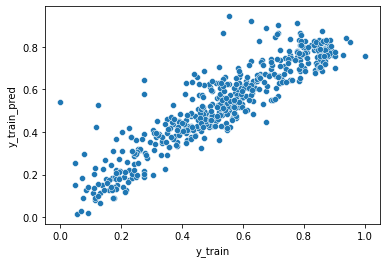

In [42]:

f=sns.scatterplot(y=y_train_pred,x=y_train_sm)
f.set(ylabel='y_train_pred', xlabel='y_train')
plt.show()

### The predicted y values and the actual y values are similar implying the model is able to explain the variance.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

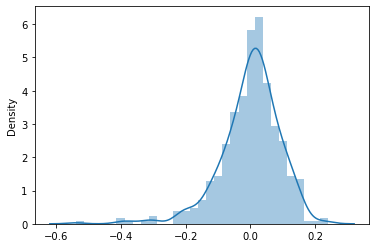

In [43]:
y_train_error=y_train_sm-y_train_pred
sns.distplot(y_train_error)

### The mean of error terms is about zero and normally distributed

[Text(0, 0.5, 'error'), Text(0.5, 0, 'y_train')]

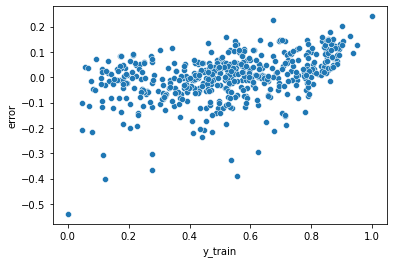

In [44]:
f=sns.scatterplot(y=y_train_error,x=y_train_sm)
f.set(ylabel='error', xlabel='y_train')

### The error terms dont follow a particular pattern and random in nature. Hence variance is constant.

In [45]:
df_test[to_scale_col]=scaler.transform(df_test[to_scale_col])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [46]:

x_test=df_test[cols_to_consider]
x_test_sm=sm.add_constant(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
y_test_sm=df_test.pop('cnt')


In [48]:
y_test_pred=lms.predict(x_test_sm)


In [49]:
r2score=r2_score(y_true=y_test_sm,y_pred=y_test_pred)
r2score

0.7415487391343343

### The r2 score of the model on the test data set comes around 0.74.

## Final conclusions

Below are the conclusion drawn from the model building process:

1. The r2 score on the train data set is 0.83 while on the test dataset is 0.74.<br>

Below are the main factors which positively impact the bike rentals:

1. The year of the rental is also important. In year 2019 the rentals count is higher than previous year. <br>
2. The feeling temperature (atemp) also impacts the bike rentals to greatest extend. Higher the temperature more the rentals thus implying the demand is higher in summer months compared to winter months.
3. On a working day the demand of bike rentals is expected to be higher.

Below are the main factors which negatively impact the bike rentals:

1. Humidity inversely affects the bike rentals. Greater is the humidity , lesser is the demand.
2. On spring season the demand of the rentals is lower compared to other seasons.
3. Windspeed also inversely impacts bike rentals. Greater the windspeed , lesser is the demand.